In [1]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
pd.set_option('display.float_format', '{:,.2f}'.format)

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생
raw_df2 = pd.read_csv('Data2_전처리.csv', encoding='UTF-8') 
raw_df2_new = pd.read_csv('Data2_신규가입자.csv', encoding='UTF-8') 
raw_df3 = pd.read_csv('Data3_전처리.csv', encoding='UTF-8') 
raw_df3_plus = pd.read_csv('Data3_증가분_전처리.csv', encoding='UTF-8') 

# 복사본 만들기 
df1 = raw_df1.copy()
df2 = raw_df2.copy()
df3 = raw_df3.copy()
df3_plus = raw_df3_plus.copy()
df2_new = raw_df2_new.copy()

c:\Users\home\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\home\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df1.head()

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,관광객수
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"


In [3]:
df2.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(만원),월별사용액(만원)
0,가평군,2023-12,484.00,"405,100.00","214,000.00"
1,가평군,2023-11,458.00,"236,800.00","218,700.00"
2,가평군,2023-10,555.00,"259,600.00","233,500.00"
3,가평군,2023-09,782.00,"311,300.00","237,600.00"
4,가평군,2023-08,473.00,"363,100.00","239,200.00"


In [4]:
df1['경기도 총결제금액(연도별)'] = df1.groupby('기준연도')['결제금액'].transform(lambda x: x.sum())
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,관광객수,경기도 총결제금액(연도별)
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00",...,"30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10"
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00",...,"30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10"
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00",...,"30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10"
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00",...,"30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10"
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00",...,"30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00",...,"436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88"
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00",...,"436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88"
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00",...,"436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88"
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00",...,"436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88"


### 지표 => 경기도 지역화폐의 활성화 정도를 최대한 객관적으로 나타낼수 있는 방향으로 (얼마나 활성화 되었는지 확인할수있는)
> 0.2 * 결제건수비율 => (해당연도 총 결제건수-해당연도 총 결제취소건수) / 해당연도 총 인구  
> 0.6 * 총결제금액비율 => (해당연도 총 결제금액-해당연도 총 결제취소금액) / 해당연도 총 인구  
> 0.2 * 신규가입자수비율 => 해당연도 총 신규가입자수 / 해당연도총 인구   
의 합산   => **활성화지표** 로 정의한다

이 지표에 가맹점 증가율(=증가분) 을 넣을지 말지 고민해봐야할듯


### 21년도 활성화 지표 구하기

In [31]:
df=pd.read_csv('병합.csv')
df

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,총결제건수(연도별),총결제금액(연도별),외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,인구 대비 관광객 수,결제취소건수 비율,결제취소금액 비율,신규가입자수 비율
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00",...,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00",...,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00",...,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00",...,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00",...,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00",...,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00",...,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00",...,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00",...,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18


In [7]:
df.columns

Index(['기준연도', '시군명', '연령대', '성별', '결제건수', '결제금액', '결제취소건수', '결제취소금액',
       '1회평균결제금액', '총인구', '총인구_남', '총인구_여', '내국인_세대수', '내국인_총인구', '내국인_남',
       '내국인_여', '등록외국인_총인구', '등록외국인_남', '등록외국인_여', '관광객수', '경기도 총결제금액(연도별)',
       '신규가입자수(명)', '월별충전액(만원)', '2024개수', '2022개수', '증가분', '총결제건수(연도별)',
       '총결제금액(연도별)', '외국인 비율', '결제건수 비율', '결제금액 비율', '관광객 비율', '인구 대비 관광객 수',
       '결제취소건수 비율', '결제취소금액 비율', '신규가입자수 비율'],
      dtype='object')

In [8]:
df['증가분']

0       -199
1       -199
2       -199
3       -199
4       -199
        ... 
1293    1355
1294    1355
1295    1355
1296    1355
1297    1355
Name: 증가분, Length: 1298, dtype: int64

- 2021~2023 경기도 통합지표구하기

In [43]:
# 빈 데이터프레임 생성
result_dfs = []

# 각 연도별로 반복
for year in [2021,2022,2023]:
    # 연도별 데이터 필터링
    year_df = df[df['기준연도'] == year]
    grouped_df=year_df.groupby('시군명',as_index=False) \
    .agg({
      '경기도 총결제금액(연도별)':'mean',
      '총결제건수(연도별)':'mean',
      #'결제건수': 'sum',
      # '결제금액': 'sum',
      '결제취소건수' : 'sum',
      '결제취소금액' : 'sum',
      '총인구': 'mean',
      '신규가입자수(명)':'mean' 
      #'신규가입자수 비율': 'mean',
      #'총결제금액(연도별)':'mean',
      # '결제건수 비율':'mean',
      # '결제금액 비율':'mean',
      # '결제취소건수 비율':'mean', 
      # '결제취소금액 비율':'mean'
    
    
     
  }
    )
    #년도별 총 건수를 구하기위해 데이터 처리
    grouped_df['총결제건수(연도별)']=grouped_df['총결제건수(연도별)'].sum()
    grouped_df['결제취소건수']=grouped_df['결제취소건수'].sum()
    grouped_df['결제취소금액']=grouped_df['결제취소금액'].sum()
    grouped_df['총인구']=grouped_df['총인구'].sum()
    grouped_df['신규가입자수(명)']=grouped_df['신규가입자수(명)'].sum()
    
    
    # 결제건수 비율과 결제금액 지표를 위한계산
    grouped_df['총결제비율'] = (grouped_df['경기도 총결제금액(연도별)']-grouped_df['결제취소금액']) / grouped_df['총인구']
    grouped_df['총결제건수비율'] = (grouped_df['총결제건수(연도별)'] -grouped_df['결제취소건수'])/ grouped_df['총인구']

   

    # 신규가입자수 지표를 위한계산
    grouped_df['신규가입자수 비율'] = grouped_df['신규가입자수(명)'] / grouped_df['총인구']

    # 년도표기
    grouped_df['기준연도'] = year
    
    # 지표계산
    grouped_df['@year지표'] = 0.2*grouped_df['총결제건수비율'] + 0.6*grouped_df['총결제비율'] + 0.2*grouped_df['신규가입자수 비율']
    
    # 결과 데이터프레임에 추가
    result_dfs.append(grouped_df)

# 모든 연도 데이터프레임 통합
final_df = pd.concat(result_dfs)

final_df_1=final_df.groupby('기준연도',as_index=False) \
                   .agg(
                     {
                       '@year지표':'mean',
                      
                       
                     }
                   ) \
                   

final_df_1


,기준연도,@year지표
0,2021,24.39
1,2022,26.41
2,2023,22.24


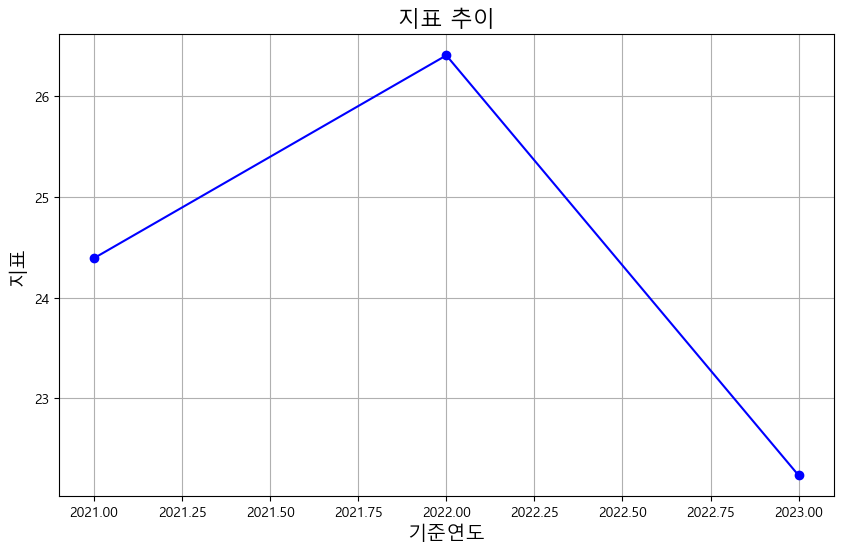

In [60]:
# 라인플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(final_df_1['기준연도'], final_df_1['@year지표'], marker='o', linestyle='-', color='b')

# 그래프 제목 및 축 레이블 설정
plt.title('지표 추이', fontsize=16)
plt.xlabel('기준연도', fontsize=14)
plt.ylabel('지표', fontsize=14)

# 그래프 표시
plt.grid(True)
plt.show()

In [57]:
final_df_1['전연도 대비 변화율'] = final_df_1['@year지표'].pct_change() * 100

In [58]:
final_df_1

,기준연도,@year지표,전연도 대비 변화율
0,2021,24.39,NaN
1,2022,26.41,8.26
2,2023,22.24,-15.80


- 2021~2023 시군별로 지표구하기

In [46]:

df_시군별지표=df.groupby(['시군명','기준연도'],as_index=False) \
  .agg({
      #'경기도 총결제금액(연도별)':'mean',
      # '결제건수': 'sum',
      # '결제금액': 'sum',
      # '결제취소건수' : 'sum',
      # '결제취소금액' : 'sum',
      '총인구': 'mean',  # 총인구는 평균을 사용하여 시군별로 인구를 대체   
      '신규가입자수 비율': 'mean',
      '총결제금액(연도별)':'mean',
      '결제건수 비율':'mean',
      '결제금액 비율':'mean',
      '결제취소건수 비율':'mean', 
      '결제취소금액 비율':'mean'
      
     
  }
     
  )

In [47]:
df_시군별지표

,시군명,기준연도,총인구,신규가입자수 비율,총결제금액(연도별),결제건수 비율,결제금액 비율,결제취소건수 비율,결제취소금액 비율
0,가평군,2022,"63,235.00",0.13,"3,483,864.16",21.75,55.09,0.22,1.28
1,가평군,2023,"63,488.00",0.17,"3,774,609.88",22.90,59.45,0.24,1.35
2,고양시,2022,"1,088,153.00",0.06,"24,065,366.65",10.79,22.12,0.08,0.25
3,고양시,2023,"1,087,607.00",0.04,"13,860,678.98",6.33,12.74,0.04,0.12
4,과천시,2021,"73,528.00",0.28,"3,945,090.59",24.44,53.65,0.24,1.09
...,...,...,...,...,...,...,...,...,...
76,하남시,2022,"328,393.00",0.14,"23,491,005.50",27.65,71.53,0.34,2.45
77,하남시,2023,"332,359.00",0.09,"13,980,900.27",18.38,42.07,0.19,1.18
78,화성시,2021,"922,092.00",0.18,"41,536,194.92",19.29,45.05,0.16,0.67
79,화성시,2022,"949,187.00",0.07,"41,555,700.45",16.50,43.78,0.13,0.67


In [48]:
df_시군별지표['지표']=round(0.2*(df_시군별지표['결제건수 비율']-df_시군별지표['결제취소건수 비율'])+0.6*(df_시군별지표['결제금액 비율']-df_시군별지표['결제취소건수 비율'])+0.2*(df_시군별지표['신규가입자수 비율']))

In [54]:
df_시군별지표.sort_values('지표',ascending=False).reset_index()

TypeError: reset_index() got an unexpected keyword argument 'index'

In [52]:
df_시군별지표.tail()

,시군명,기준연도,총인구,신규가입자수 비율,총결제금액(연도별),결제건수 비율,결제금액 비율,결제취소건수 비율,결제취소금액 비율,지표
76,하남시,2022,"328,393.00",0.14,"23,491,005.50",27.65,71.53,0.34,2.45,48.00
77,하남시,2023,"332,359.00",0.09,"13,980,900.27",18.38,42.07,0.19,1.18,29.00
78,화성시,2021,"922,092.00",0.18,"41,536,194.92",19.29,45.05,0.16,0.67,31.00
79,화성시,2022,"949,187.00",0.07,"41,555,700.45",16.50,43.78,0.13,0.67,29.00
80,화성시,2023,"989,676.00",0.09,"42,006,634.43",15.42,42.44,0.11,0.60,28.00


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
from matplotlib.ticker import ScalarFormatter
fig = px.line(data_frame=df_시군별지표, x='기준연도', y='지표', color='시군명', markers=True, line_shape='linear', title='시군별 신규가입자수 추이')
fig.update_layout(
    yaxis_tickformat=',',  # 천 단위 구분 기호를 추가
    xaxis_title='기준연도',
    yaxis_title='신규가입자수',
    legend_title='시군명',
    title='시군별 지표 추이',
    template='plotly_white'
)
# X축 눈금 설정 (고유 기준연도 값으로 설정)
fig.update_xaxes(tickvals=df_시군별지표['기준연도'].unique())


지표에 관련된 변수컬럼을 위 3개로 잡은 이상, 가중치를 바꿔도, 지표는 크게 바뀌지 않는다.

In [44]:
df_시군별지표['지표'].describe()

count   81.00
mean    27.16
std      8.89
min      9.00
25%     20.00
50%     26.00
75%     34.00
max     48.00
Name: 지표, dtype: float64

경기도 전체 24년도 목표 지표는 최소 3분위 지표정도 =>  34정도로 목표로 하면 좋을것같다. 